In [9]:
# Write a kmeans plus plus algorithm to initialize the centroids to be used in the kmeans algorithm
# Initialize centroids based on a probability index set by their distance from each other
# Dataset is a numpy array and k is the number of centroids


import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
%matplotlib inline


def kmeans_plus_plus(dataset, k):
    # define the shape of the dataset
    N, D = dataset.shape
    # define the centroid size
    C = np.zeros([k, D])
    # pick a random instance in the dataset
    random_index = np.random.choice(len(dataset))
    # choose a random instance
    random_instance = dataset[random_index]
    for i in range(k):
        # define the distance array to store all items in the dataset from the randomly chosen instance
        distance_array = np.linalg.norm(random_instance - dataset , axis = 1)
        # each distance proportionally increase the chances for the next data to be chosen
        prob_array = distance_array / np.sum(distance_array)
        # based on the distances, chose a random instance index
        chosen_index = np.random.choice(len(dataset) , p = prob_array)
        # assing the next instance to the centroid[i]
        C[i] = dataset[chosen_index]
        # last chosen C[i] will be the new reference to chose next instance for C[i+1]
        random_instance = C[i]  
    return C

# test the function 
if __name__ == '__main__':
    
    # download your copy of wine dataset from: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/
    # change the format to .txt or .cvs if current data is causing any parsing error.
    
    dataset = np.loadtxt('wine.data.txt' , dtype = float, delimiter = ',')
    dataset = np.array(dataset)
    print(kmeans_plus_plus(dataset, 2))
     
    # if there was a need for standardization, this code below could be applied:
    # standardized_data = [(i - np.mean(dataset)) / (np.std(dataset)) for i in dataset]
    

[[1.000e+00 1.386e+01 1.350e+00 2.270e+00 1.600e+01 9.800e+01 2.980e+00
  3.150e+00 2.200e-01 1.850e+00 7.220e+00 1.010e+00 3.550e+00 1.045e+03]
 [2.000e+00 1.184e+01 2.890e+00 2.230e+00 1.800e+01 1.120e+02 1.720e+00
  1.320e+00 4.300e-01 9.500e-01 2.650e+00 9.600e-01 2.520e+00 5.000e+02]]


/Users/volkansonmez/miniconda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[       0.    17592402.704  4545800.928  2633614.463  1341434.153
   916424.194   684095.537   415042.347   674861.281   353365.048
   657438.809   187113.672   492970.971   565012.338   138874.119]


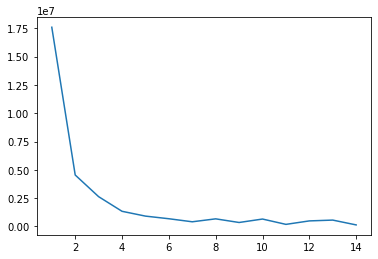

In [10]:
# the Within-Cluster-Sum-of-Squares amount normally goes down as the number of clusters increase
# the ideal number of clusters can be chosen if the WCSS graph achieves a clear elbow shape

def k_means(dataset, k): # return the WCSS value for chosen k clusters
    # Initialize the WCSS value to 0
    WCSS = 0
    # create an array to collect the indices of the groups
    final_array = np.zeros(len(dataset))
    # initialize the centroids based on the kmeansplusplus function. If data is too big, just choose k random instances
    C = kmeans_plus_plus(dataset, k)
    # create an old C initialized with zeros
    C_old = np.zeros(C.shape)
    # define the error function
    parameter_gradient = np.linalg.norm(C-C_old)
    # count the number of epochs performed until the error is zero, put an iterator
    epoch = 0
    # continue to assign new C until the distance btw C_new and C_old is very small
    while parameter_gradient > 1e-4:  
        # loop over the dataset to measure the instance distances with C
        # assign the group number for each instance based on the shortest distance from the instance to the C
        for i in range(len(dataset)):
            distance = np.linalg.norm((dataset[i] - C), axis = 1) # axis 1 will output distance array with size k
            centroid_index = np.argmin(distance) # the closest centroid_index from the instance 
            final_array[i] = centroid_index # assign the centroid index as group number to an array 
        # assign the current C as C_old to update the new C
        C_old = np.copy(C)
        # loop over each index of the centroid
        for i in range(k):
            # list of items with the same group numbers are assigned to sub_groups
            sub_group = [dataset[j] for j in range(len(dataset)) if final_array[j] == i]
            # take the mean of the sub-group and 
            mean_of_sub_group = np.mean(sub_group, axis = 0)
            # assign the new values to C
            C[i] = mean_of_sub_group
        # update the parameter gradient after assigning the new C    
        parameter_gradient = np.linalg.norm(C - C_old) # when C does not change, we reach to zero error 
        # update epoch value
        epoch += 1

    # To measure WCSS, sum up the square of the "distances from all group data to their mean"
    for j in range(k):
        grouped_data = [dataset[i] for i in range(len(dataset)) if final_array[i] == j]
        mean_of_grouped_data = np.mean(grouped_data, axis = 0) # outputs number of attributes
        for i in range(len(grouped_data)):
            WCSS += np.sum((grouped_data[i] - mean_of_grouped_data)**2)  
            
    
    # return the final cluster coordinates, the array carrying indices of all data points, and the WCSS with given k
    return epoch, C, final_array, WCSS


if __name__ == '__main__':
    dataset = np.loadtxt('wine.data.txt' , dtype = float, delimiter = ',')
    dataset = np.array(dataset)
    np.random.seed(1)
    k = 15
    def run_k_means():
        WCSS_list = np.zeros(k)
        for i in range(1, k):
            epoch, C, final_array, WCSS = k_means(dataset, i)
            WCSS_list[i] = WCSS

        return WCSS_list

    result = run_k_means()
    print(result)
    plt.plot(np.arange(1, k), result[1:])
    